# Preparação dos dados

Este notebook destina-se a preparação inicial dos dados que serão utilizados pelos modelos de redes neurais artificias.

Local: EUA  
Período dos Dados: 2019

Fonte do dados: [NSRDB](https://nsrdb.nrel.gov/)

## Importação de bibliotecas 

In [1]:
# Manipulação dos dados (importação, exploração e transformação)
import pandas as pd

# Visualização dos dados

import seaborn as sns
import matplotlib.pyplot as plt

## Nomenclatura adotada
+ **Atributos previsores** -> Variáveis preditores e/ou independente;
+ **Atributo Alvo** -> Variável dependente que pretende-se prever.

In [25]:
url = 'https://github.com/fellypesb/projeto_PET_2021/raw/main/Dados/local_EUA/turner_hall_NSRDB_2019.csv'
# Atualizar url
local_EUA = pd.read_csv(url, header=2, sep=',')

In [3]:
local_EUA.head()

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Unnamed: 16
0,2019,1,1,0,30,0,0,-1.4,161.32,0.18,3.6,0.9,281,99.22,-1.3,987,NaN
1,2019,1,1,1,30,0,0,-1.5,154.10,0.18,3.0,0.9,291,99.18,-1.4,988,NaN
2,2019,1,1,2,30,0,0,-1.6,143.88,0.18,2.3,0.8,311,99.21,-1.5,989,NaN
3,2019,1,1,3,30,0,0,-1.8,132.71,0.18,2.2,0.8,339,97.97,-1.5,989,NaN
4,2019,1,1,4,30,0,0,-2.1,121.33,0.18,2.3,0.8,182,96.20,-1.6,990,NaN


In [4]:
# Preparação dos dados

def adjustData(data):
    '''
        Esta função realiza as seguintes transformações no conjunto de dados:
        - Exclui colunas desnecessárias para análises
        - Renomeia os labels das colunas deixando-as minúsculas e sem espaço entre as palavras
        - Filtra as amostras por horário das 5h30m às 17h30m
    '''
    df_ = data.loc[:,'Year':'Pressure'] 
    df_.columns = df_.columns.str.lower().str.replace(' ', '_') 
    df_ = df_.query('hour >= 5 and hour <= 17').reset_index().drop('index', axis=1)
    return df_

In [5]:
local_EUA_adjust = adjustData(local_EUA)
local_EUA_adjust.head()

,year,month,day,hour,minute,ghi,clearsky_ghi,dew_point,solar_zenith_angle,surface_albedo,wind_speed,precipitable_water,wind_direction,relative_humidity,temperature,pressure
0,2019,1,1,5,30,0,0,-2.7,110.09,0.18,2.6,0.8,14,92.90,-1.7,991
1,2019,1,1,6,30,0,0,-3.3,99.26,0.18,3.0,0.9,19,90.35,-1.9,993
2,2019,1,1,7,30,3,15,-3.9,88.73,0.18,3.6,0.9,21,84.88,-1.7,994
3,2019,1,1,8,30,16,143,-4.4,79.93,0.18,3.9,0.9,25,77.87,-1.0,994
4,2019,1,1,9,30,34,283,-4.5,72.36,0.18,3.5,0.9,26,72.27,-0.1,995


# Correlações
A seguir, buscou-se as 4 melhores correlações com a variável de irradiância solar. Isso porque, é necessário a escolha de atributos previsores que auxiliem o modelo em suas previsões do alvo. 

In [6]:
best_corr = local_EUA_adjust.loc[:,'ghi':'pressure'].corr()['ghi'].abs().sort_values(ascending=False)[1:5]
best_corr

clearsky_ghi          0.820147
solar_zenith_angle    0.799324
relative_humidity     0.606415
temperature           0.512623
Name: ghi, dtype: float64

Atributos | Correlações absolutas
-------------------- | --------
Irradiância Céu Claro | 0.820147
Ângulo Zenital | 0.799324
Umidade Relativa | 0.606415
Temperatura | 0.512623

In [7]:
# local_EUA_adjust.loc[:,'ghi':'pressure'].corr()

### Leaky feature?

Observou-se que a variável irradiância de céu claro possui as mesmas variações da irradiância normal durante o dia, porém com valores um pouco mais elevado. Isto é coerente, pois ambas se diferem no pressuposto de haver ou não nuvens no momento de coleta da taxa de irradiância. Tendo observado essas características, surgiu o seguinte questionamento: A variável irradiância de céu claro prova vazamento de informações sobre a taxa de irradiância que objetiva-se prever?

In [8]:
local_EUA_adjust[['hour', 'minute','clearsky_ghi', 'ghi']][:13] 

,hour,minute,clearsky_ghi,ghi
0,5,30,0,0
1,6,30,0,0
2,7,30,15,3
3,8,30,143,16
4,9,30,283,34
5,10,30,390,53
6,11,30,445,64
7,12,30,444,67
8,13,30,386,45
9,14,30,279,33


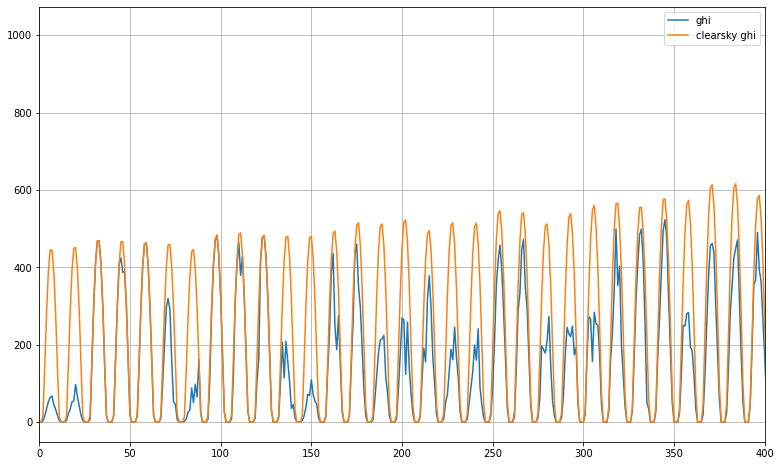

In [9]:
plt.figure(figsize=(13,8))
plt.plot(local_EUA_adjust['ghi'], label='ghi')
plt.plot(local_EUA_adjust['clearsky_ghi'], label='clearsky ghi')
plt.xlim(0,400)
plt.legend()
plt.grid()

In [10]:
local_EUA_adjust[['hour','minute','solar_zenith_angle', 'ghi']][:13]

,hour,minute,solar_zenith_angle,ghi
0,5,30,110.09,0
1,6,30,99.26,0
2,7,30,88.73,3
3,8,30,79.93,16
4,9,30,72.36,34
5,10,30,66.81,53
6,11,30,63.86,64
7,12,30,63.88,67
8,13,30,66.87,45
9,14,30,72.45,33


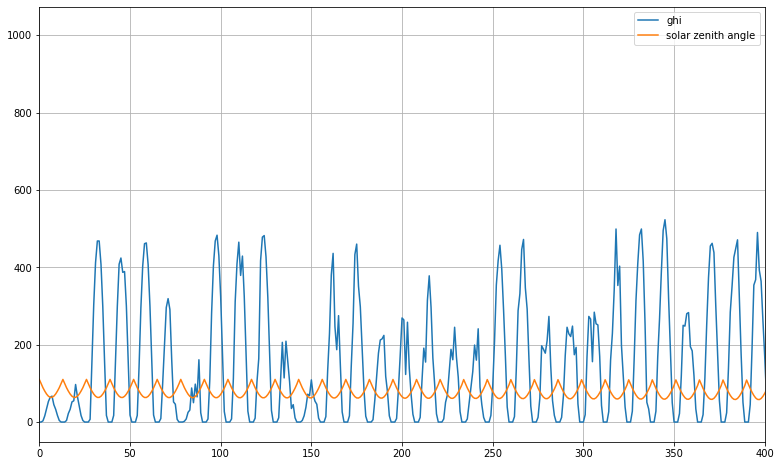

In [11]:
plt.figure(figsize=(13,8))
plt.plot(local_EUA_adjust['ghi'], label='ghi')
plt.plot(local_EUA_adjust['solar_zenith_angle'], label='solar zenith angle')
plt.xlim(0,400)
plt.legend()
plt.grid()

# Valores inconsistentes

A seguir verificou-se a presença de valores inconsistentes (_NaN_ ou _NULL_) no conjunto de dados utilizado. Neste caso, não foram encontrados nenhum desses valores, caso contrário seria necessário o tratamento dos mesmos.

In [12]:
# Devolve um único booleano para informar se há alguma amostra/registrro com valor incosistente no Dataset
result = local_EUA_adjust.isnull().any().any() 
print(f'Existe algum valor inconsistente no conjunto de dados? {result}')

Existe algum valor inconsistente no conjunto de dados? False


# Adição de atributo

Devido a sazonalidade marcante das estações do ano na série temporal optou-se por adicionar um atributo referente a essa informação para cada amostra. Os périodos de cada estação para esta localidade são:

- Verão: de junho a agosto
- Outono: de setembro a novembro
- Inverno: de dezembro a fevereiro 
- Primavera: de março a maio

In [13]:
verao = [6, 7, 8]     #0
outono = [9, 10, 11]  #1
inverno = [12, 1, 2]  #2
primavera = [3, 4, 5] #3

seasons = []
for i in local_EUA_adjust.month:
    if i in verao:
        seasons.append(0)
    elif i in outono:
        seasons.append(1)
    elif i in inverno:
        seasons.append(2)
    elif i in primavera:
        seasons.append(3)
        
local_EUA_adjust['seasons'] = seasons

# Divisão dos dados
A seguir, realizou-se a subdivisão dos dados em 3 (três) conjuntos:
+ Dados de **Treino**;
+ Dados de **Validação**;
+ Dados de **Teste**.

Os dados de treino e validação serão utilizados durante a etapa de prototipagem dos modelos. Somente após encontrar as **melhores configurações** para o modelo (atributos previsores, hiperparâmetros, etc..), que o mesmo, será submetido ao conjunto de teste, para que, seja possível avaliar com maior precisão a capacidade de **generalização** do modelo final.

Optou-se por dividir os dados de forma que, 90% dos registros totais fossem destinados ao conjunto de treinamento, 10% do resgistros totais, destinados ao conjunto de teste e 10% do conjunto de treinamento, destinado ao conjunto de validação.

Durante a divisão dos dados, também foram descartados todos os atributos que não serão utilizados, são eles: atributos com correlação (com irradiância solar) **menor** que a temperatura e atributos que possuem **valores únicos** em todos os registros (ano e minutos). O novo conjunto formado reduziu o número de atributos de 16 para 8, incluíndo atributos previsores e atributo alvo.

In [14]:
mask = best_corr.index.to_list()
[mask.insert(i, j) for i,j in zip(range(0,5),['month', 'day', 'hour','seasons','ghi'])]
mask

['month',
 'day',
 'hour',
 'seasons',
 'ghi',
 'clearsky_ghi',
 'solar_zenith_angle',
 'relative_humidity',
 'temperature']

In [15]:
local_EUA_adjust[mask].head()

,month,day,hour,seasons,ghi,clearsky_ghi,solar_zenith_angle,relative_humidity,temperature
0,1,1,5,2,0,0,110.09,92.90,-1.7
1,1,1,6,2,0,0,99.26,90.35,-1.9
2,1,1,7,2,3,15,88.73,84.88,-1.7
3,1,1,8,2,16,143,79.93,77.87,-1.0
4,1,1,9,2,34,283,72.36,72.27,-0.1


In [16]:
def split_data(full_data, train_size):
    '''
        Função que realiza a subdivisão de um conjunto total de dados em 3 (três) grupos, treino, validação e teste.
        Esta divisão é realizada de acordo o tamanho especificado.
        
        Parâmetros:
        
        full_data: pd.DataFrame
            Conjunto total de dados que será dividido.
        
        train_size: float
            Tamanho desejado para o conjunto de treinamento. É necessário que este valor esteja entre 0 e 1
            
        Retorno:
            Esta função retorna 3 (três) conjunto de dados no formato pd.DataFrame.
    '''
    train = full_data[:int(train_size*len(full_data))]
    valid = train[int(train_size*len(train)):]
    test = full_data[int(train_size*len(full_data)):]
    
    return (train, valid, test)

In [17]:
local_EUA.shape, local_EUA_adjust[mask].shape

((8760, 17), (4745, 9))

In [18]:
train, valid, test = split_data(local_EUA_adjust[mask], 0.9)

print(f'Qtd. registros de Treino: \t{len(train)}')
print(f'Qtd. registros de Validação: \t {len(valid)}')
print(f'Qtd. registros de Teste: \t {len(test)}')

Qtd. registros de Treino: 	4270
Qtd. registros de Validação: 	 427
Qtd. registros de Teste: 	 475


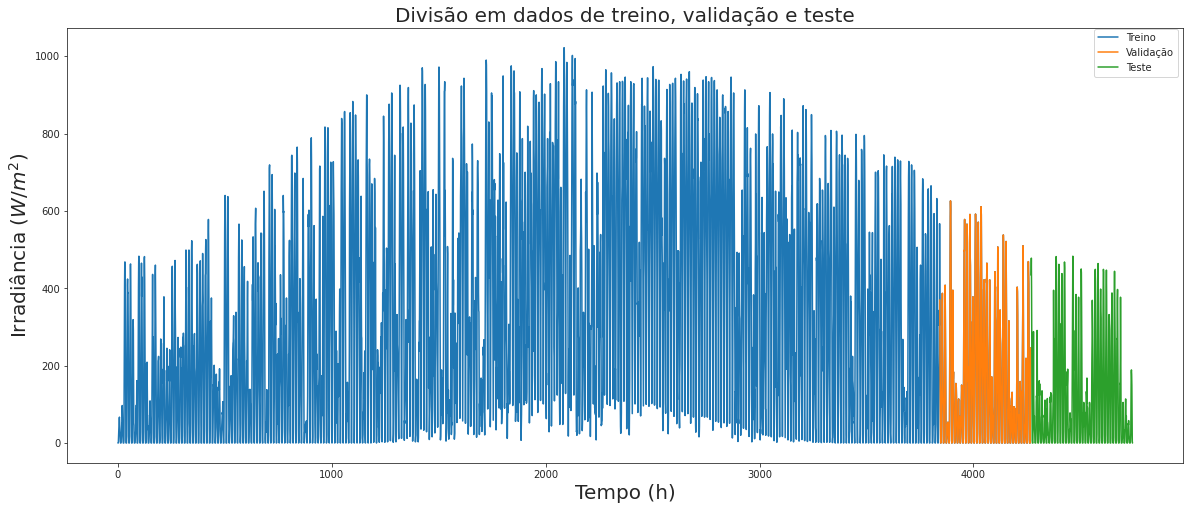

In [19]:
with sns.axes_style('ticks'):
    plt.figure(figsize=(20,8))
    plt.plot(train['ghi'], label='Treino')
    plt.plot(valid['ghi'], label='Validação')
    plt.plot(test['ghi'], label='Teste')
    plt.xlabel('Tempo (h)', fontsize=20)
    plt.ylabel('Irradiância ($W/m^2$)', fontsize=20)
    plt.title('Divisão em dados de treino, validação e teste', fontsize=20)
    plt.legend(bbox_to_anchor=(1,1.01))

In [20]:
# with sns.axes_style('whitegrid'):
#     plt.figure(figsize=(20,8))
#     plt.plot(valid['ghi'])
#     plt.xlabel('Tempo (h)', fontsize=20)
#     plt.ylabel('Irradiância ($W/m^2$)', fontsize=20)
#     #plt.xlim(1500,2500)
#     #plt.legend()

In [21]:
# Exportação dos dados para o formato CSV

#train.to_csv('../../Dados/local_EUA/train_local_EUA.csv', index=False)
#valid.to_csv('../../Dados/local_EUA/valid_local_EUA.csv', index=False)
#test.to_csv('../../Dados/local_EUA/test_local_EUA.csv', index=False)

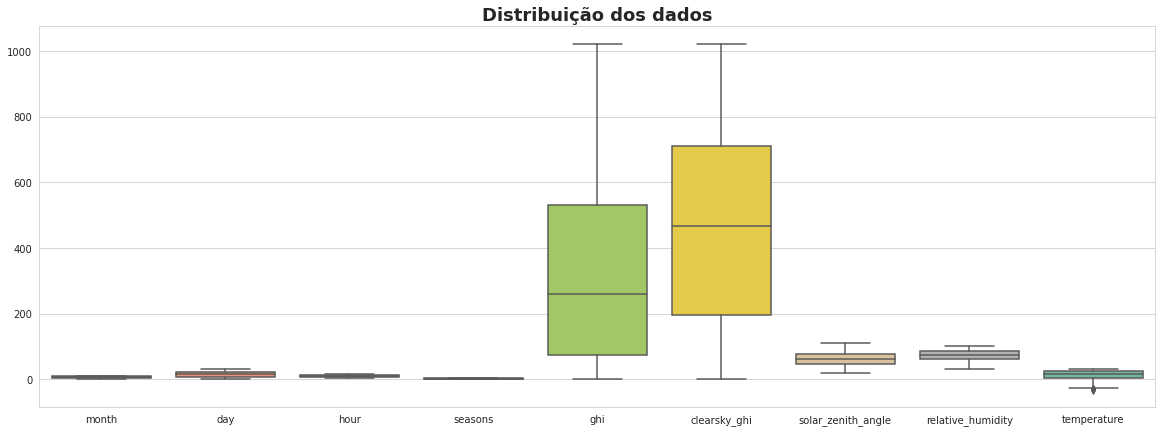

In [22]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(20,7))
    sns.boxplot(data=train, palette='Set2')
    ax.set_title('Distribuição dos dados', fontdict={'fontsize':18, 'fontweight': 'bold'})
    plt.show()

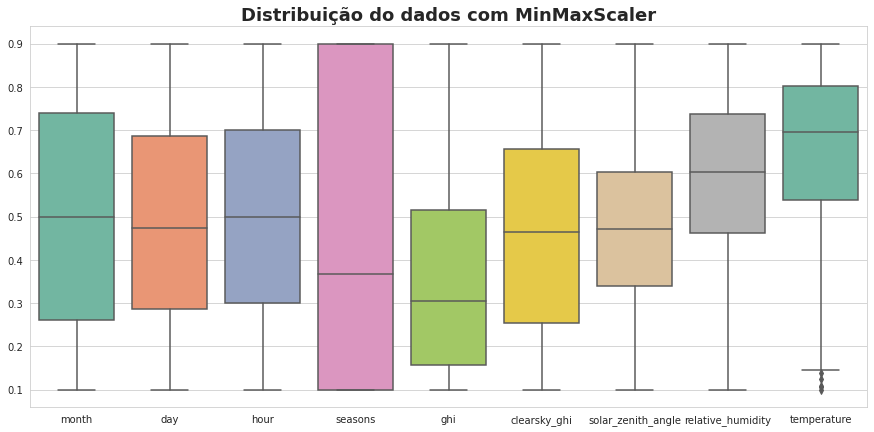

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.1,0.9))

train_norm = scaler.fit_transform(train)

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.boxplot(data=train_norm, palette='Set2')
    ax.set_title('Distribuição do dados com MinMaxScaler', fontdict={'fontsize':18, 'fontweight': 'bold'})
    plt.xticks([0,1,2,3,4,5,6,7,8], train.columns)
    plt.show()